<a href="https://colab.research.google.com/github/ramannaik1408/GIS/blob/main/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research Interest**

I am intersted on working on data about population density and the income variance in that particulat area.
The region I have chosen is one of favourite in the US, that is, California. The reason I have chosen California is because of its size, diversity and complexity. Plus, there is a lot of data to work with for California.


### Resources

I have found a perfect shapefile for California already from the following resource:

https://hub.arcgis.com/datasets/a61c138d0a6946da8d1ebb8d1c9db13a_0/explore?location=17.138890%2C75.315503%2C2.87

I have also found data for the median income of California according to County:

https://data.ca.gov/dataset/income-limits-by-county

I have also found data for crime rate by county in California:

https://www.ppic.org/wp-content/uploads/crime-rates-by-county-2019.xlsx

I am working on data with respect to income and crime in California
I am going to compare these factors to find trends and relation between income and crimne in this state


I have uploaded the data that I have found in the GitHub repo

# **PS0**

In [279]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [280]:
!pip install mapclassify
import mapclassify

In [281]:
! wget -q -O cali-counties.zip https://github.com/ramannaik1408/GIS/raw/main/California_County_Boundaries.zip
zip_ref = zipfile.ZipFile('cali-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close()
cali=gpd.read_file('cnty19_1.shp') #load the shapefile of california

In [282]:
cali.dtypes

OBJECTID         int64
COUNTY_NAM      object
COUNTY_ABB      object
COUNTY_NUM       int64
COUNTY_COD      object
COUNTY_FIP      object
ISLAND          object
GlobalID        object
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

In [283]:
cali_final= cali[['OBJECTID','COUNTY_NAM','SHAPE_Leng','SHAPE_Area','geometry']]


<Axes: >

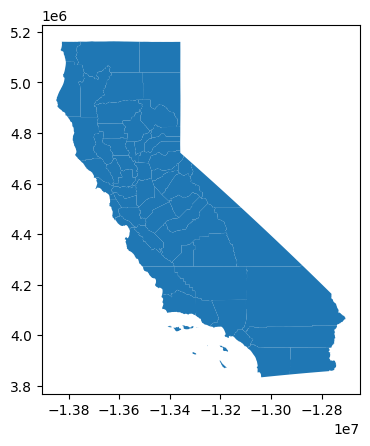

In [284]:
cali_final.plot()

# **PS1**

##Dataset Resources

I have found this dataset containing income of California residents by county from the following source:

https://data.ca.gov/dataset/income-limits-by-county

The AMI column contains the Annual Median Income in 2019 which I have made use of for plotting the map

In [285]:
income_cali = pd.read_csv('https://github.com/ramannaik1408/GIS/raw/main/2022-income-limits.csv')
income_cali

,County,AMI,ALI_1,ALI_2,ALI_3,ALI_4,ALI_5,ALI_6,ALI_7,ALI_8,...,LI_7,LI_8,MOD_1,MOD_2,MOD_3,MOD_4,MOD_5,MOD_6,MOD_7,MOD_8
0,Alameda,142800,15000,17100,19250,21400,23100,24800,26550,28250,...,135950,144700,119950,137100,154200,171350,185050,198750,212450,226200
1,Alpine,94900,10000,11400,12850,14250,15400,16550,17650,18800,...,90100,95900,79750,91100,102500,113900,123000,132100,141250,150350
2,Amador,86600,9100,10400,11700,13000,14050,15100,16100,17150,...,85950,91500,72750,83100,93500,103900,112200,120500,128850,137150
3,Butte,85000,8950,10200,11500,12750,13750,14800,15800,16850,...,77300,82250,71400,81600,91800,102000,110150,118300,126500,134650
4,Calaveras,90000,9450,10800,12150,13500,14600,15650,16750,17800,...,89300,95050,75600,86400,97200,108000,116650,125300,133900,142550
5,Colusa,80300,8450,9650,10850,12050,13000,14000,14950,15900,...,77300,82250,67450,77100,86700,96350,104050,111750,119450,127200
6,Contra Costa,142800,15000,17100,19250,21400,23100,24800,26550,28250,...,135950,144700,119950,137100,154200,171350,185050,198750,212450,226200
7,Del Norte,80300,8450,9650,10850,12050,13000,14000,14950,15900,...,77300,82250,67450,77100,86700,96350,104050,111750,119450,127200
8,El Dorado,102200,10750,12300,13800,15350,16600,17800,19050,20250,...,100550,107000,85850,98100,110400,122650,132450,142250,152100,161900
9,Fresno,80300,8450,9650,10850,12050,13000,14000,14950,15900,...,77300,82250,67450,77100,86700,96350,104050,111750,119450,127200


In [286]:
income_cali.rename(columns={'County': 'COUNTY_NAM','AMI': 'Annual Median Income'}, inplace=True)
##income_cali.rename(columns={'AMI': 'Annual Monthly Income'}, inplace=True)
income_cali=income_cali[['COUNTY_NAM','Annual Median Income']]
print(income_cali.columns)

Index(['COUNTY_NAM', 'Annual Median Income'], dtype='object')


##Plotting map containing income of California:

<Axes: >

[]

[]

Text(0.5, 240.73140612572422, 'source/definition: zillow.com/research/data')

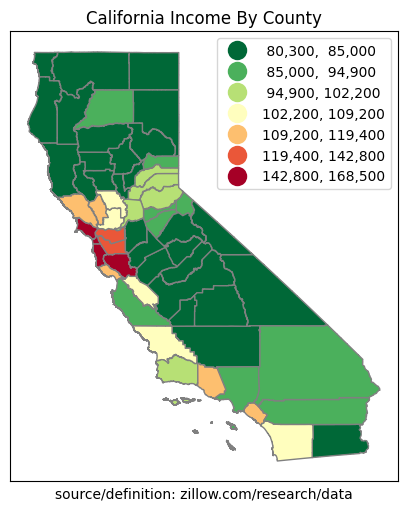

In [287]:
map1 = pd.merge(cali_final, income_cali, on='COUNTY_NAM',how='outer',indicator=False)
fig, ax = plt.subplots(1, figsize=(5,10))
map1.plot(ax=ax,column='Annual Median Income',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("California Income By County")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: zillow.com/research/data''')

:

##Dataset Resource

I have found this dataset containing crime data in California

https://www.ppic.org/wp-content/uploads/crime-rates-by-county-2019.xlsx

In [288]:
cali_crime=pd.read_excel('https://github.com/ramannaik1408/GIS/raw/main/crime-rates-by-county-2019.xlsx')
cali_crime

,County,Population,Violent,Murder,Rape,Robbery,Aggrevated assault,Property,Burglary,Vehicle theft,Larceny theft
0,Alameda,1664783.0,584.700829,5.766517,42.167658,295.293741,241.472913,4008.390283,391.402363,616.717014,3000.270906
1,Alpine,1149.0,1131.418625,0.000000,174.064404,0.000000,957.354221,2785.030461,1131.418625,348.128808,1305.483029
2,Amador,37820.0,290.851401,2.644104,21.152829,23.796933,243.257536,1771.549445,470.650449,97.831835,1203.067160
3,Butte,221521.0,462.258657,3.159971,81.256405,75.387886,302.454395,2402.481029,501.532586,391.836440,1509.112003
4,Calaveras,45085.0,321.614728,2.218033,75.413109,19.962293,224.021293,1858.711323,658.755684,153.044250,1046.911390
5,Colusa,21990.0,263.756253,0.000000,68.212824,40.927694,154.615734,1577.989995,495.679854,254.661210,827.648931
6,Contra Costa,1150621.0,359.631886,4.693118,27.811069,132.015668,195.112031,2481.703358,311.136334,399.697207,1770.869817
7,Del Norte,27127.0,401.813691,7.372728,47.922734,95.845468,250.672761,2963.836768,925.277399,173.259115,1865.300254
8,El Dorado,190018.0,169.983896,2.631330,31.049690,28.944626,107.358250,1346.714522,331.021272,76.834826,938.858424
9,Fresno,1015195.0,466.609863,5.417678,26.300366,90.425977,344.465842,2284.782726,462.374224,343.086796,1479.321707


##Rounding off to 2 decimal places to make it look neater

In [289]:
cali_crime.rename(columns={'County': 'COUNTY_NAM'}, inplace=True)
cali_crime=cali_crime.round(2)

##Plotting the map

So basically the above dataset contains crime data for Violent which is the sum of crimes of Murder, Rape, Robbery, Aggravated Assault per 100000 people. So I did not have to download the number by population since data was already processed

Hence, I have used the column Violent for plotting the map for Violent crimes.

<Axes: >

[]

[]

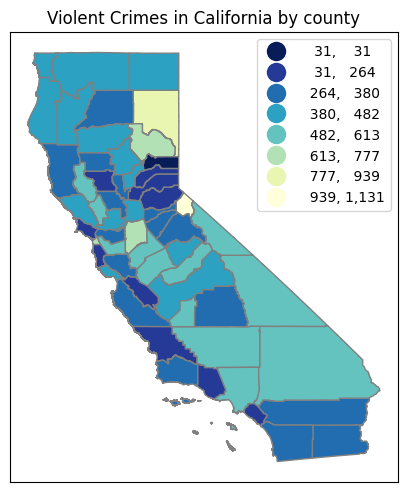

In [290]:
map2 = pd.merge(cali_final,cali_crime, on='COUNTY_NAM',how='outer',indicator=False)
fig, ax = plt.subplots(1, figsize=(5,10))
map2.plot(ax=ax,column='Violent',legend=True,cmap='YlGnBu_r',
          scheme='natural_breaks',k=8, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Violent Crimes in California by county")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

##Plotting the map

The above dataset also contains crime data for Property which is the sum of crimes of Burglary, Vehicle Theft and Larceny Theft per 100000 people. So I did not have to divide the number by population since data was already processed

Hence, I have used the column Property for plotting the map for Property crimes.

<Axes: >

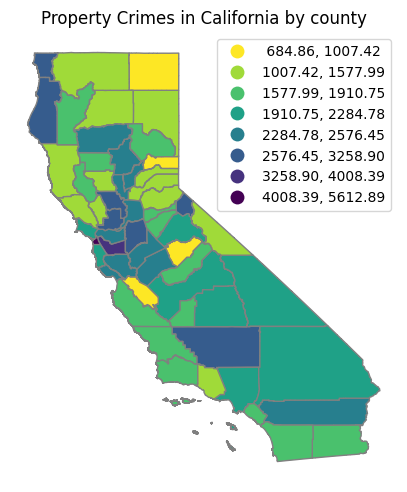

In [291]:
map3 = pd.merge(cali_final,cali_crime, on='COUNTY_NAM',how='outer',indicator=False)
fig, (ax) = plt.subplots(1,figsize=(5,10))
map3.plot(ax=ax,column='Property',cmap='viridis_r', scheme='natural_breaks',k=8, edgecolor='grey',linewidth=1,legend=True)
leg1 = ax.get_legend()
ax.set_axis_off()
ax.title.set_text("Property Crimes in California by county")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')

##Side by side comparision of both the maps against Income

##Starting off with Property Crimes

<Axes: >

[]

[]

<Axes: >

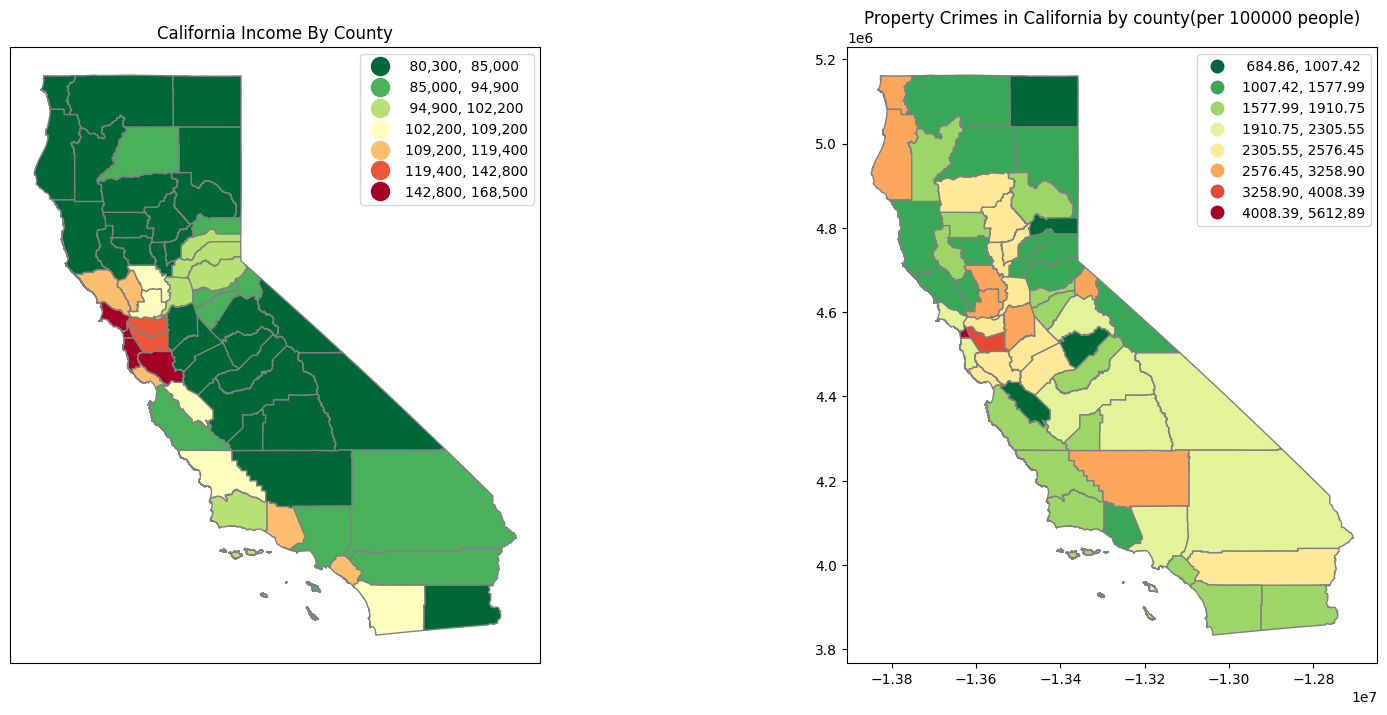

In [292]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'wspace': 0.5})
map1 = pd.merge(cali_final, income_cali, on='COUNTY_NAM',how='outer',indicator=False)
#fig, ax = plt.subplots(1, figsize=(5,10))
map1.plot(ax=ax,column='Annual Median Income',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("California Income By County")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

map3 = pd.merge(cali_final,cali_crime, on='COUNTY_NAM',how='outer',indicator=False)
#fig, ax2 = plt.subplots(1,figsize=(5,10))
map3.plot(ax=ax2,column='Property',cmap='RdYlGn_r', scheme='natural_breaks',k=8, edgecolor='grey',linewidth=1,legend=True)
leg1 = ax2.get_legend()
#ax2.set_axis_off()
ax2.title.set_text("Property Crimes in California by county(per 100000 people)")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks


From the above map we can conclude that property crimes are reasonably high in areas like San Francisco Bay area, Los Angeles and San Diego.

The reason for this can be inferred from the income map because the income is quite high in those counties, hence we can find richer people, hence more Property crime because of more money and high tech property.


There is an exception case in this map, that is, the north western side(Del Norte and Humboldt Region) of the sate, where income is low, but property crime is high. One of the reason could be that, they are tourist hotspots because they are filled with National Parks, hence a lot of visitors, so that might be affecting the crime rate there.

##Violent Crimes

<Axes: >

[]

[]

<Axes: >

[]

[]

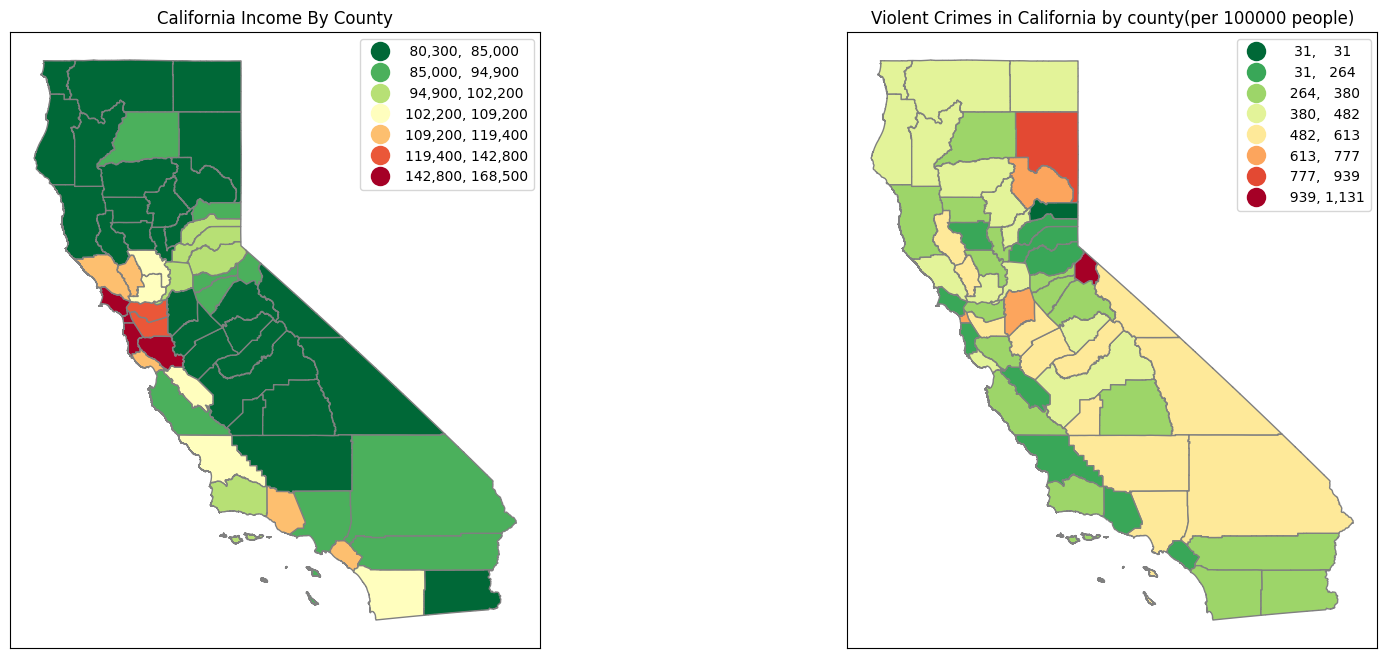

In [293]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'wspace': 0.5})
map1 = pd.merge(cali, income_cali, on='COUNTY_NAM',how='outer',indicator=False)
#fig, ax = plt.subplots(1, figsize=(5,10))
map1.plot(ax=ax,column='Annual Median Income',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("California Income By County")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

map2 = pd.merge(cali,cali_crime, on='COUNTY_NAM',how='outer',indicator=False)
#fig, ax = plt.subplots(1, figsize=(5,10))
map2.plot(ax=ax2,column='Violent',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=8, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})
leg1 = ax.get_legend()
ax2.title.set_text("Violent Crimes in California by county(per 100000 people)")
ax2.set_xticks([]) #kills xticks
ax2.set_yticks([]) #kills xticks

From the violent crime we can conclude that the richer areas like Los Angeles, San Francisco, San Diego have relatively lesser crime per 100000 people. This is reasonable because we can see that these counties have high population, hence, predators are in fear of commiting these crimes.

Towards the northeast side of California that is less populated has higher crime rate. One of the reasons could be less population. Since it is not a very happening place and income is lesser, it is more suseptible to crime.

# **PS2**

Previously I had worked on relation between crime and income. Now I have extended that research towords literacy.

I want to see how literacy rate affects crime.

### Literacy Rate data resource

I have found a dataset for literacy rate in California by county from the following source:

https://nces.ed.gov/naal/estimates/stateestimates.aspx

In [294]:
#reading the CSV file
cali_literacy=pd.read_csv('https://github.com/ramannaik1408/GIS/raw/main/California%20Literacy%20Data.csv')
cali_literacy

,Location,FIPS code,Population size,Percent lacking basic prose literacy skills,Lower bound,Upper bound
0,California,6000.0,"26,029,840",23.0,20.3,26.2
1,Alameda County,6001.0,"1,100,269",19.0,11.9,28.3
2,Alpine County,6003.0,983,8.0,3.8,15.2
3,Amador County,6005.0,"27,145",10.0,4.7,17.2
4,Butte County,6007.0,"162,597",11.0,5.3,19.8
...,...,...,...,...,...,...
59,* The state and county Federal Information pro...,NaN,NaN,NaN,NaN,NaN
60,1 Estimated population size of persons 16 year...,NaN,NaN,NaN,NaN,NaN
61,2 Those lacking Basic prose literacy skills in...,NaN,NaN,NaN,NaN,NaN
62,3 The estimated percent lacking Basic prose li...,NaN,NaN,NaN,NaN,NaN


**Renaming the column**

In [295]:
cali_literacy.rename(columns={'Location':'COUNTY_NAM'}, inplace=True)
cali_literacy

,COUNTY_NAM,FIPS code,Population size,Percent lacking basic prose literacy skills,Lower bound,Upper bound
0,California,6000.0,"26,029,840",23.0,20.3,26.2
1,Alameda County,6001.0,"1,100,269",19.0,11.9,28.3
2,Alpine County,6003.0,983,8.0,3.8,15.2
3,Amador County,6005.0,"27,145",10.0,4.7,17.2
4,Butte County,6007.0,"162,597",11.0,5.3,19.8
...,...,...,...,...,...,...
59,* The state and county Federal Information pro...,NaN,NaN,NaN,NaN,NaN
60,1 Estimated population size of persons 16 year...,NaN,NaN,NaN,NaN,NaN
61,2 Those lacking Basic prose literacy skills in...,NaN,NaN,NaN,NaN,NaN
62,3 The estimated percent lacking Basic prose li...,NaN,NaN,NaN,NaN,NaN


In [296]:
cali_literacy['COUNTY_NAM']=cali_literacy['COUNTY_NAM'].str.replace(' County','') #get rid of ' County' [note space in front of county]
cali_literacy

,COUNTY_NAM,FIPS code,Population size,Percent lacking basic prose literacy skills,Lower bound,Upper bound
0,California,6000.0,"26,029,840",23.0,20.3,26.2
1,Alameda,6001.0,"1,100,269",19.0,11.9,28.3
2,Alpine,6003.0,983,8.0,3.8,15.2
3,Amador,6005.0,"27,145",10.0,4.7,17.2
4,Butte,6007.0,"162,597",11.0,5.3,19.8
...,...,...,...,...,...,...
59,* The state and county Federal Information pro...,NaN,NaN,NaN,NaN,NaN
60,1 Estimated population size of persons 16 year...,NaN,NaN,NaN,NaN,NaN
61,2 Those lacking Basic prose literacy skills in...,NaN,NaN,NaN,NaN,NaN
62,3 The estimated percent lacking Basic prose li...,NaN,NaN,NaN,NaN,NaN


### Plotting map with illiteracy data

<Axes: >

[]

[]

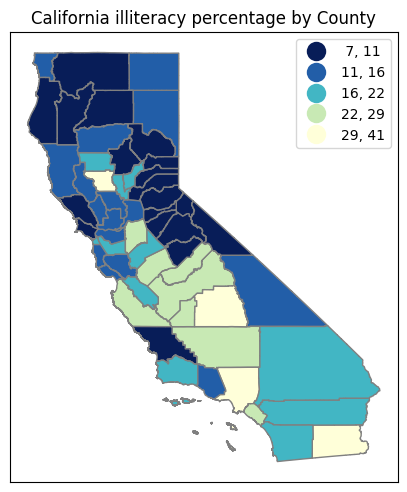

In [297]:
map4= pd.merge(cali_final, cali_literacy, on='COUNTY_NAM',how='outer',indicator=False)
fig, ax = plt.subplots(1, figsize=(5,10))
map4.plot(ax=ax,column="Percent lacking basic prose literacy skills",legend=True,cmap='YlGnBu_r',scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})
leg4 = ax.get_legend()
ax.title.set_text("California illiteracy percentage by County")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks



### Comparing illiteracy and crime

In [298]:
cali_scatter = map2.copy()
cali_scatter["geometry"] = cali_scatter["geometry"].centroid

<Axes: >

[]

[]

<Axes: title={'center': 'California illiteracy By County and \n Property Crime(per 100000 people)'}>

<Axes: >

[]

[]

<Axes: title={'center': 'California illiteracy By County and \n Violent Crime(per 100000 people)'}>

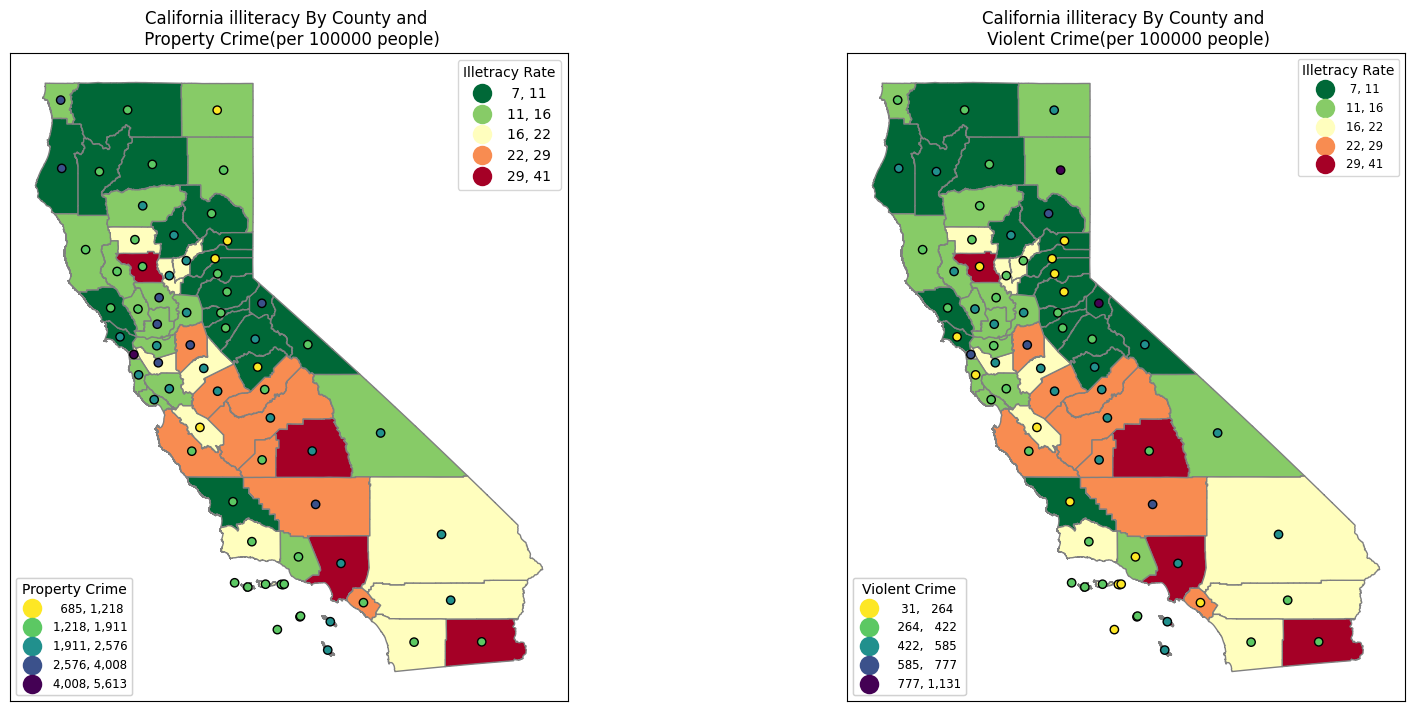

In [299]:
map4= pd.merge(cali_final, cali_literacy, on='COUNTY_NAM',how='outer',indicator=False)
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(18,18), gridspec_kw={'wspace': 0.5})
map4.plot(ax=ax,column="Percent lacking basic prose literacy skills",legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Illiteracy Rate''')

ax.title.set_text("California illiteracy By County and \n Property Crime(per 100000 people)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
cali_scatter.plot(ax=ax,column='Property',legend=True,cmap='viridis_r',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l2 = ax.get_legend()
l2.set_title('''Property Crime''')

ax.add_artist(l2)
ax.add_artist(l1)

map5= pd.merge(cali_final, cali_literacy, on='COUNTY_NAM',how='outer',indicator=False)

map5.plot(ax=ax2,column="Percent lacking basic prose literacy skills",legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},markersize = 100)
l3 = ax2.get_legend()
l3.set_title('''Illiteracy Rate''')


ax2.title.set_text("California illiteracy By County and \n Violent Crime(per 100000 people)")
ax2.set_xticks([]) #kills xticks
ax2.set_yticks([]) #kills xticks
cali_scatter.plot(ax=ax2,column='Violent',legend=True,cmap='viridis_r',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l4 = ax2.get_legend()
l4.set_title('''Violent Crime''')

ax2.add_artist(l3)
ax2.add_artist(l4)

From the above graphs, surprisingly, we can see that illerate percent is relatively high in the surroundings of Los Angeles and San Diego. In these counties the crime is somewhat high, too.

And also, again surprisngly, violent crimes and especially property crimes seem to be higher in area with low illiteracy rate. This comes as a shock, but this could be due to the fact that these counties are far from cities which leads to lesser job opportunities.

### Ideal place to live

For anyone planning to buy their dream house, they would prefer buying a house at a location where there is less crime, a place where they can earn good money and, of course, a place where the house is affordable.

So I am going add another variable and compare all these variables, so that we can find an ideal place to live in the state of California.

### Housing data resource

I have found the ideal data for Average house price in California by county from the following source:

https://www.zillow.com/research/data/

In [300]:
housing_price=pd.read_csv('https://github.com/ramannaik1408/GIS/raw/main/County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
housing_price

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,208172.788596,...,829502.810854,821242.741172,809771.934361,798850.697690,794995.450197,797207.594955,803503.732566,813903.557266,826811.908041,839780.328951
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,146385.155298,...,280494.664766,279775.162247,279405.017697,279727.799914,281175.034995,282702.836685,284417.957941,286321.765242,288618.967790,290539.190184
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,109047.176651,...,282122.217000,280561.789892,278962.267728,277810.413585,277241.447932,277264.124421,277922.424892,278705.849581,279517.195775,279853.296741
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,144001.236955,...,469794.199802,461785.739170,455694.900206,452409.120809,451379.630780,452147.348464,454099.982215,456847.226011,459823.101562,462334.960502
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,217703.083159,...,856569.796522,849344.740159,844153.147158,842332.828485,845497.899143,852278.907339,861774.630570,873182.847040,885118.607013,896653.069164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,846,3206,Banner County,county,NE,NE,"Scottsbluff, NE",31,7,NaN,...,309607.876790,302173.541898,294956.505840,290882.066415,293584.363109,298157.986272,302772.781170,307977.389681,313113.572008,317389.495922
3070,1648,3207,Daggett County,county,UT,UT,NaN,49,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318274.936585
3071,1432,3208,Thomas County,county,NE,NE,NaN,31,171,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139373.434343
3072,2794,3212,McPherson County,county,NE,NE,"North Platte, NE",31,117,NaN,...,264030.696683,256663.947563,248667.657916,243333.005667,244843.114807,249018.002984,253154.272982,257516.145402,261854.018970,265660.729309


###Cleaning up the data

In [301]:
housing_price = housing_price[['RegionName','RegionType','State','2022-12-31']]
housing_price = housing_price.loc[housing_price['State']=='CA']
housing_price.rename(columns={'RegionName':'COUNTY_NAM'}, inplace=True)
housing_price['COUNTY_NAM']=housing_price['COUNTY_NAM'].str.replace(' County','')
housing_price

,COUNTY_NAM,RegionType,State,2022-12-31
0,Los Angeles,county,CA,8.295028e+05
4,San Diego,county,CA,8.565698e+05
5,Orange,county,CA,1.006981e+06
9,Riverside,county,CA,5.790747e+05
13,San Bernardino,county,CA,5.179181e+05
16,Santa Clara,county,CA,1.460325e+06
19,Alameda,county,CA,1.072412e+06
23,Sacramento,county,CA,5.204879e+05
37,Contra Costa,county,CA,8.059103e+05
46,Fresno,county,CA,3.781982e+05


### Plotting housing price map

<Axes: >

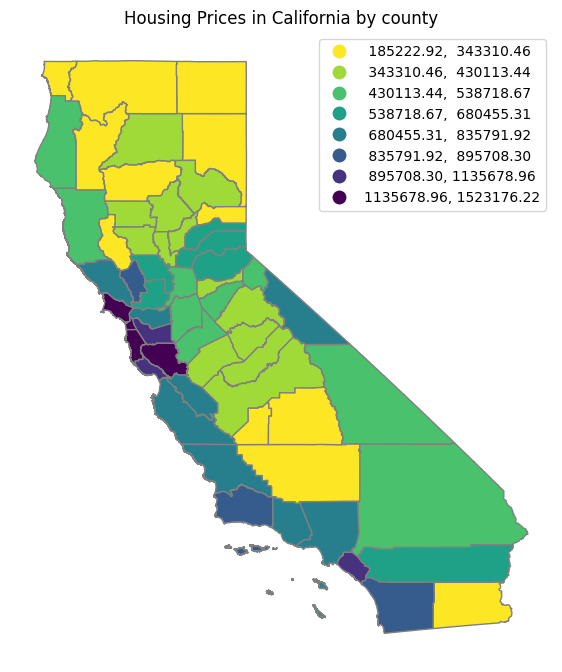

In [302]:
map6 = pd.merge(cali_final,housing_price, on='COUNTY_NAM',how='outer',indicator=False)
fig, (ax) = plt.subplots(1,figsize=(7,10))
map6.plot(ax=ax,column='2022-12-31',cmap='viridis_r', scheme='natural_breaks',k=8, edgecolor='grey',linewidth=1,legend=True)
leg1 = ax.get_legend()
ax.set_axis_off()
ax.title.set_text("Housing Prices in California by county")

### Comparing Housing Prices with Violent Crime and Income

In [303]:
map8=map1.copy()
map8["geometry"] = map8["geometry"].centroid

<Axes: >

[]

[]

<Axes: title={'center': 'California Housing Price By County and \n Violent Crime(per 100000 people)'}>

<Axes: >

<Axes: title={'center': 'California Housing Price By County and \n Annual Median Income'}>

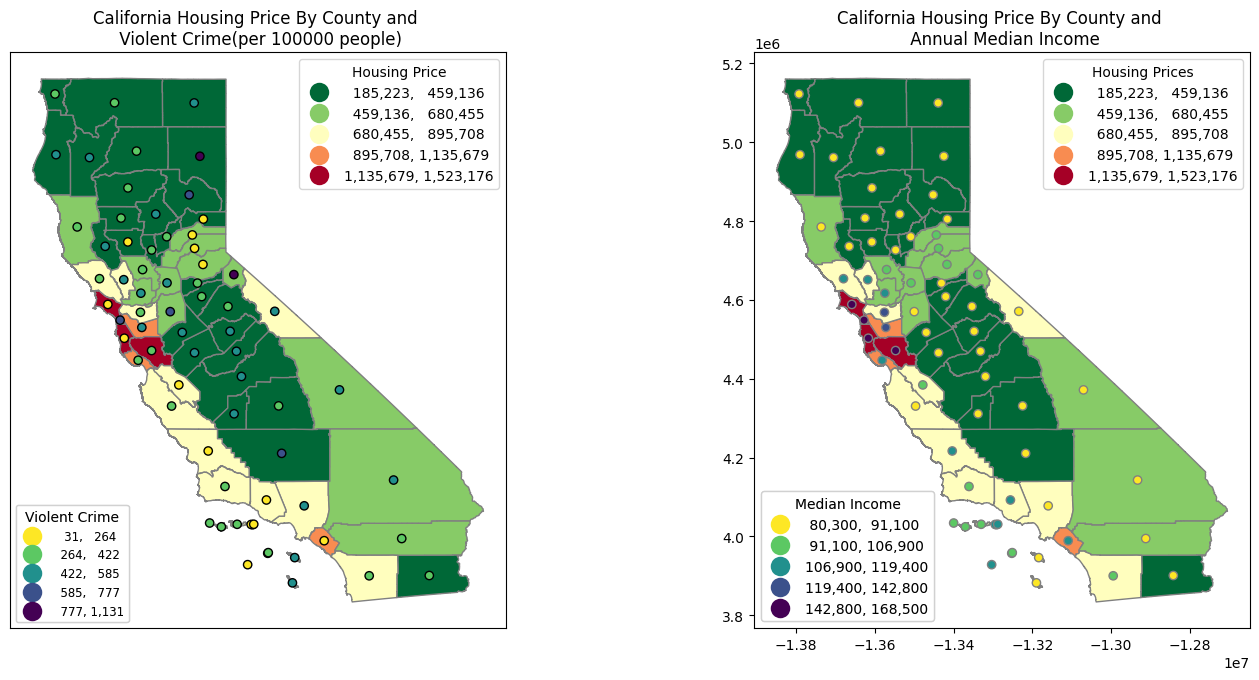

In [304]:
map7= pd.merge(cali_final, housing_price, on='COUNTY_NAM',how='outer',indicator=False)
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16,16), gridspec_kw={'wspace': 0.5})
map7.plot(ax=ax,column="2022-12-31",legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Housing Price''')

ax.title.set_text("California Housing Price By County and \n Violent Crime(per 100000 people)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
cali_scatter.plot(ax=ax,column='Violent',legend=True,cmap='viridis_r',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l2 = ax.get_legend()
l2.set_title('''Violent Crime''')

ax.add_artist(l2)
ax.add_artist(l1)

map7.plot(ax=ax2,column="2022-12-31",legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})

l3 = ax2.get_legend()
l3.set_title('''Housing Prices''')
ax2.title.set_text("California Housing Price By County and \n Annual Median Income")
map8.plot(ax=ax2,column="Annual Median Income",legend=True,cmap='viridis_r',scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower left','markerscale':1.4})

l4 = ax2.get_legend()
l4.set_title('''Median Income''')

ax2.add_artist(l3)
ax2.add_artist(l4)

### Compring Housing Prices with Property Crime and Income

<Axes: >

[]

[]

<Axes: title={'center': 'California Housing Price By County and \n Property Crime(per 100000 people)'}>

<Axes: >

<Axes: title={'center': 'California Housing Price By County and \n Annual Median Income'}>

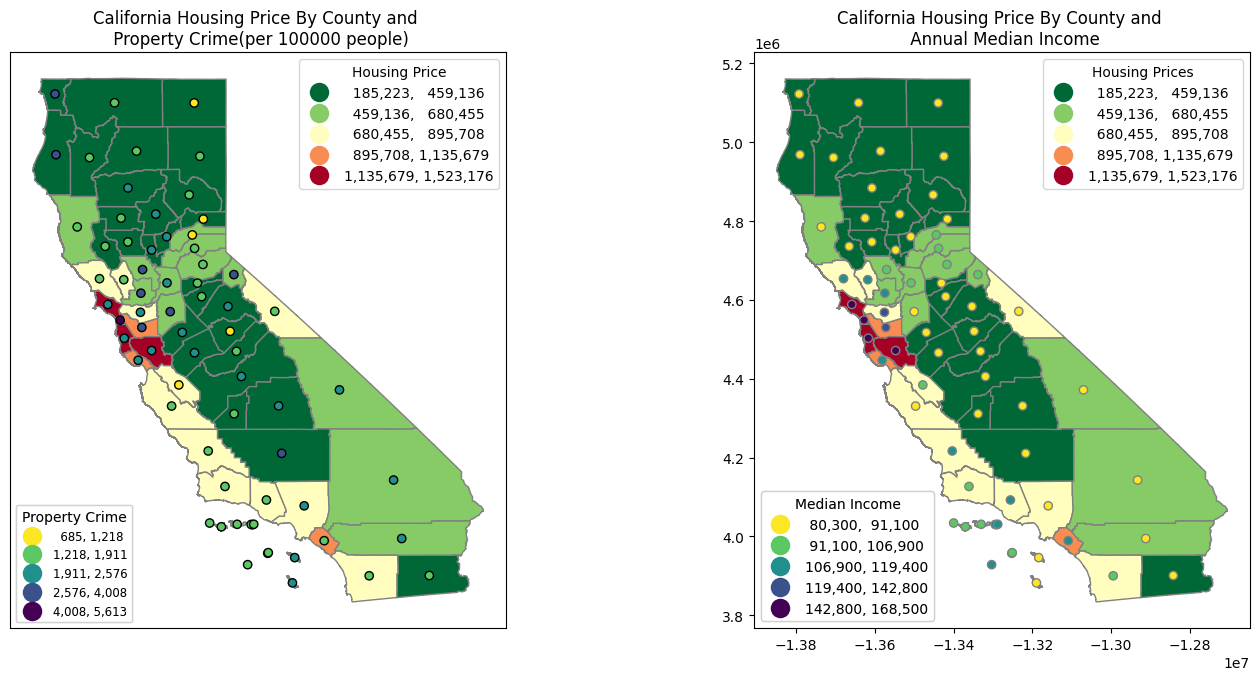

In [305]:
map7= pd.merge(cali_final, housing_price, on='COUNTY_NAM',how='outer',indicator=False)
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16,16), gridspec_kw={'wspace': 0.5})
map7.plot(ax=ax,column="2022-12-31",legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Housing Price''')

ax.title.set_text("California Housing Price By County and \n Property Crime(per 100000 people)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
cali_scatter.plot(ax=ax,column='Property',legend=True,cmap='viridis_r',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l2 = ax.get_legend()
l2.set_title('''Property Crime''')

ax.add_artist(l2)
ax.add_artist(l1)

map7.plot(ax=ax2,column="2022-12-31",legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})

l3 = ax2.get_legend()
l3.set_title('''Housing Prices''')
ax2.title.set_text("California Housing Price By County and \n Annual Median Income")
map8.plot(ax=ax2,column="Annual Median Income",legend=True,cmap='viridis_r',scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower left','markerscale':1.4})

l4 = ax2.get_legend()
l4.set_title('''Median Income''')

ax2.add_artist(l3)
ax2.add_artist(l4)

By comparing the above maps we can see that selective counties around cities like San Diego, Los Angeles and san Francisco seem to be ideal to settle down.

They have a perfect balance of low crime, good income, and not really expensive houses.

Therefore in a expensive state like California, these places can you some bucks and give you almost everyb other facility needed.

### Highlighting the area of interest

<Axes: >

<Axes: >

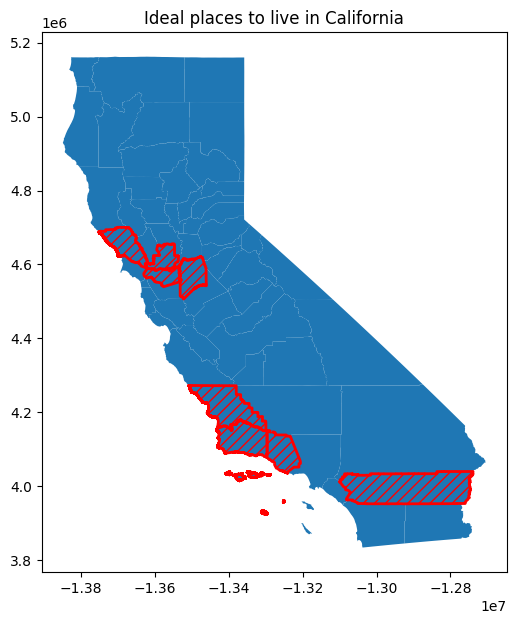

In [324]:
cali_highlight=cali_final.query("COUNTY_NAM=='Ventura' | COUNTY_NAM=='Santa Barbara' | COUNTY_NAM=='San Bernito' | COUNTY_NAM=='San Joaquin' | COUNTY_NAM=='Contra Costa' | COUNTY_NAM=='Solano' | COUNTY_NAM=='Sonoma' | COUNTY_NAM=='San Luis Obispo' | COUNTY_NAM=='Riverside'")
fig, ax = plt.subplots(1, figsize=(6,10))
cali_final.plot(ax=ax)
cali_highlight.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')
ax.title.set_text("Ideal places to live in California")

## Scatter Plot

### Dataset Resource


This is another California housing dataset that I have mad use of, which was available in Scikit Learn

Source:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html


In [306]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [307]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [308]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Histogram

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

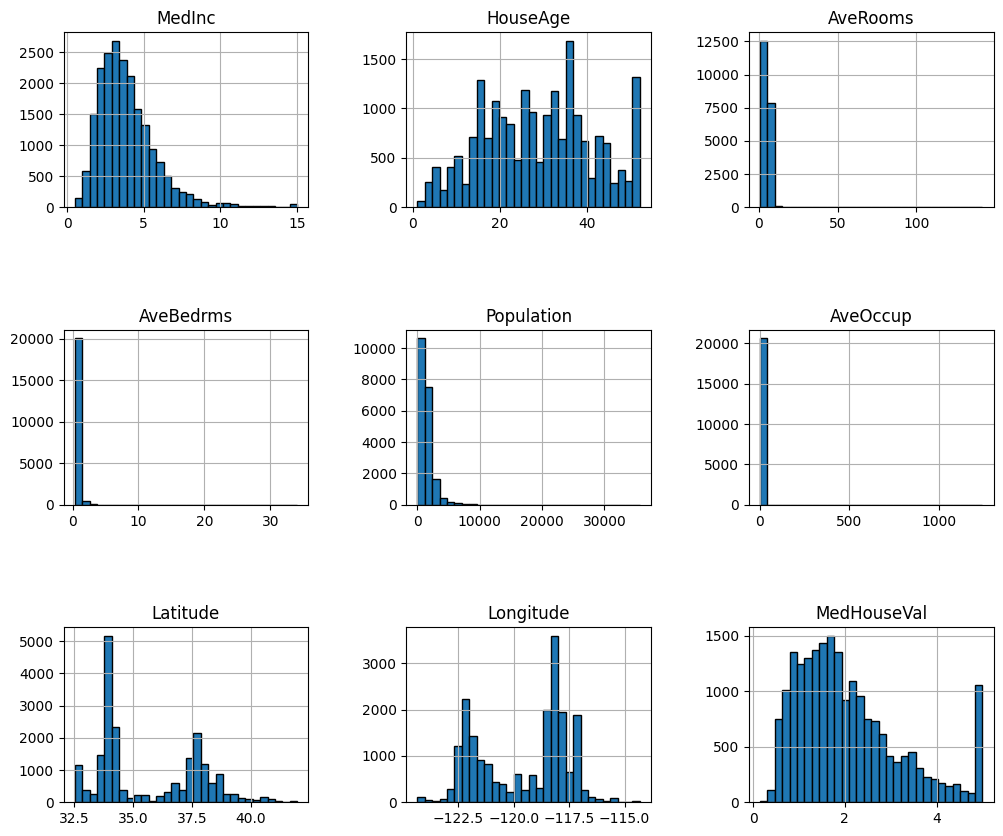

In [309]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<Axes: xlabel='Longitude', ylabel='Latitude'>

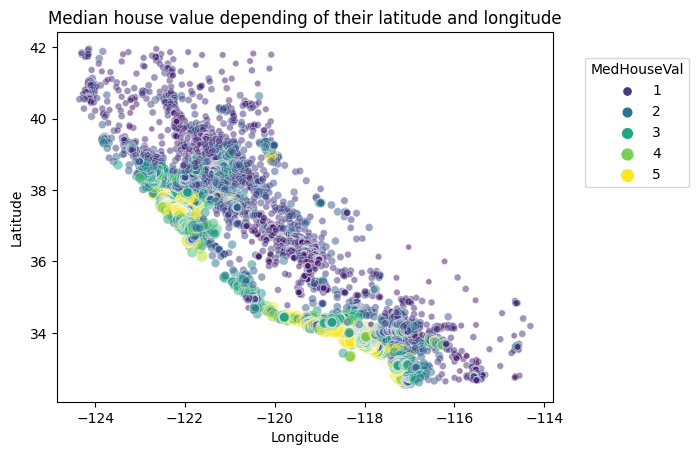

In [310]:
import seaborn as sns

sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of their latitude and longitude")

In [311]:
import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(california_housing.frame.shape[0]), size=500, replace=False)

In [312]:
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

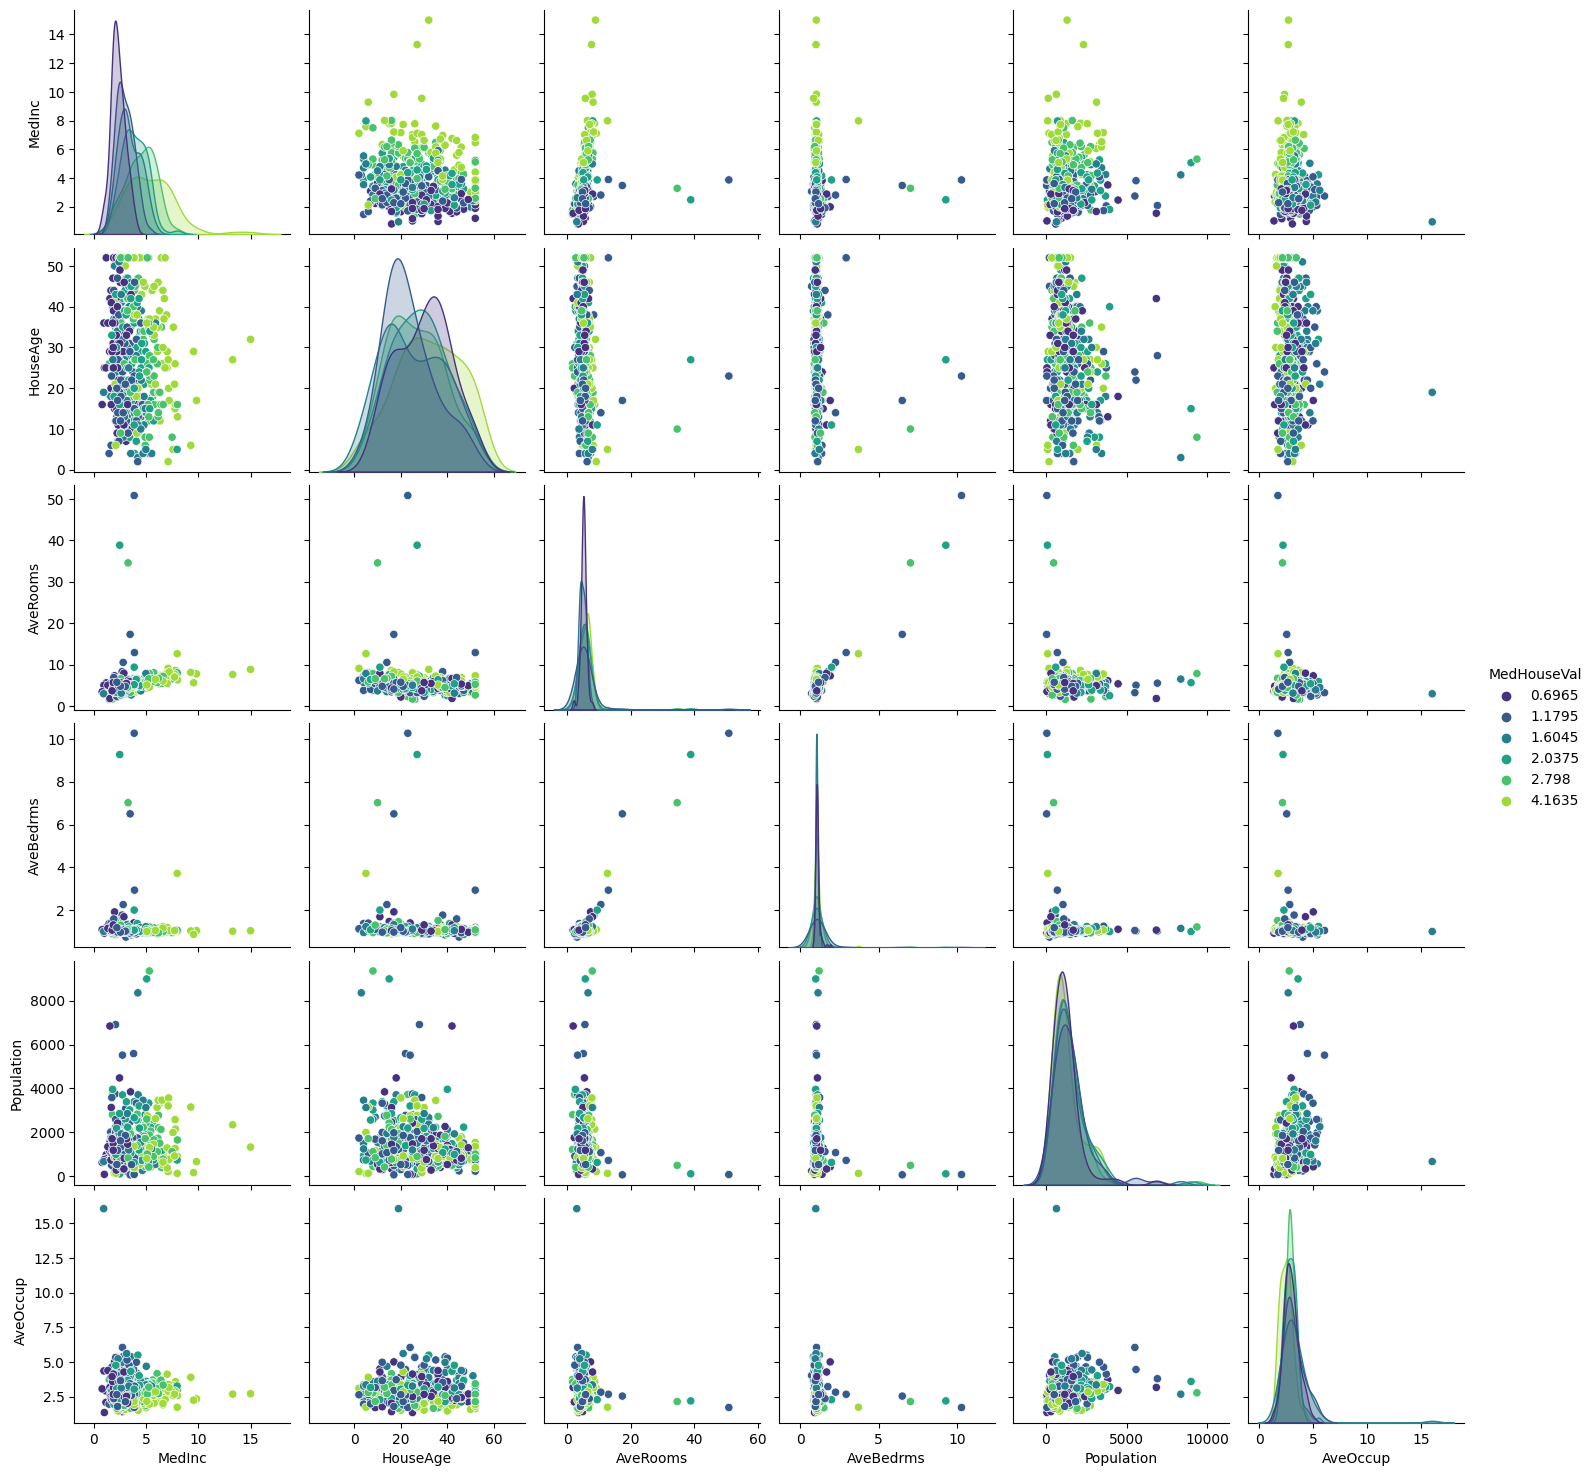

In [313]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

In [314]:
california_housing.frame[:20].style.background_gradient(cmap='Greens')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.325200,41.000000,6.984127,1.023810,322.000000,2.555556,37.880000,-122.230000,4.526000
1,8.301400,21.000000,6.238137,0.971880,2401.000000,2.109842,37.860000,-122.220000,3.585000
2,7.257400,52.000000,8.288136,1.073446,496.000000,2.802260,37.850000,-122.240000,3.521000
3,5.643100,52.000000,5.817352,1.073059,558.000000,2.547945,37.850000,-122.250000,3.413000
4,3.846200,52.000000,6.281853,1.081081,565.000000,2.181467,37.850000,-122.250000,3.422000
5,4.036800,52.000000,4.761658,1.103627,413.000000,2.139896,37.850000,-122.250000,2.697000
6,3.659100,52.000000,4.931907,0.951362,1094.000000,2.128405,37.840000,-122.250000,2.992000
7,3.120000,52.000000,4.797527,1.061824,1157.000000,1.788253,37.840000,-122.250000,2.414000
8,2.080400,42.000000,4.294118,1.117647,1206.000000,2.026891,37.840000,-122.260000,2.267000
9,3.691200,52.000000,4.970588,0.990196,1551.000000,2.172269,37.840000,-122.250000,2.611000


<Axes: >

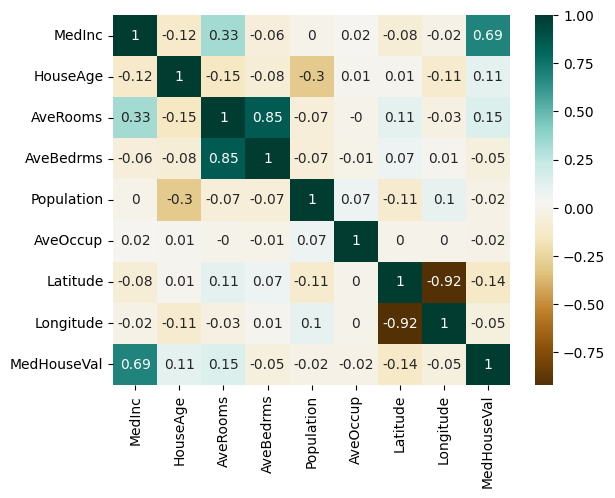

In [315]:
sns.heatmap(california_housing.frame.corr().round(2),cmap="BrBG",annot=True)

## Basemap

In [316]:
! pip install contextily
import contextily as cx

In [317]:
cali_final = cali_final.to_crs(epsg=3857)

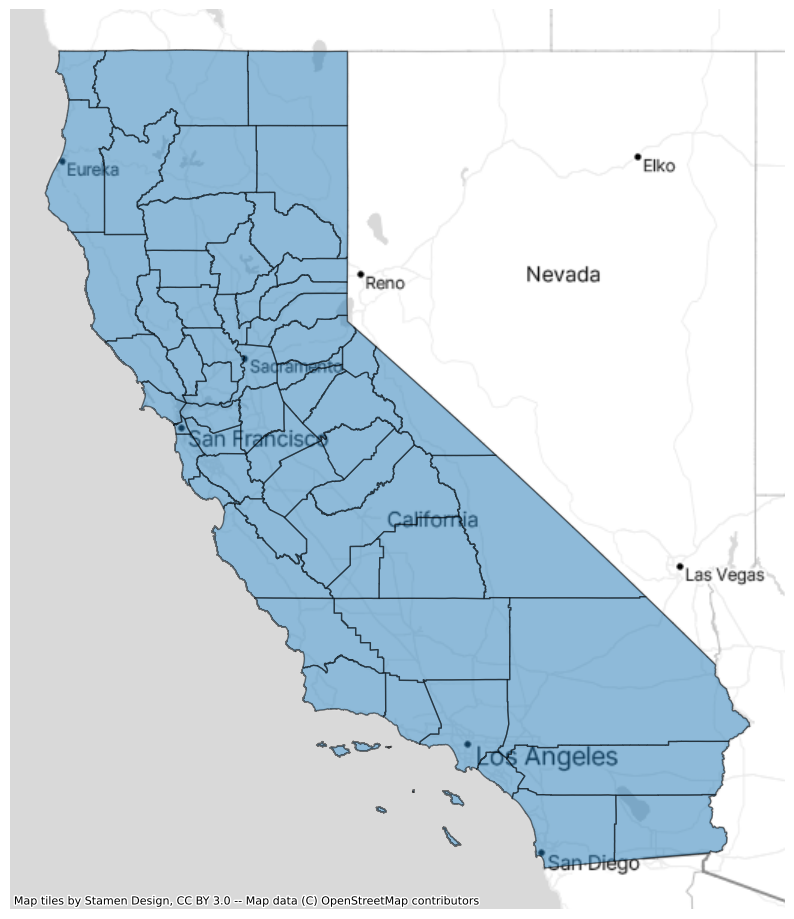

In [318]:
ax = cali_final.plot(figsize=(10, 20), alpha=0.5, edgecolor="black")
#cx.add_basemap(ax)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
#cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor)
ax.set_axis_off()